<Marvin Maps (plateifu='7443-12703', mode='remote', data_origin='api', bintype='HYB10', template='GAU-MILESHC')>


/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: RuntimeWarning: divide by zero encountered in true_divide


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

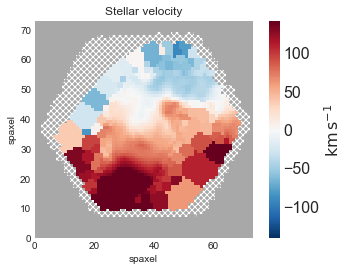

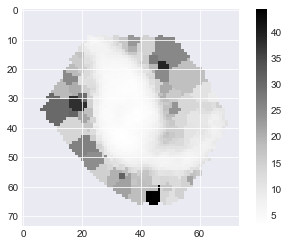

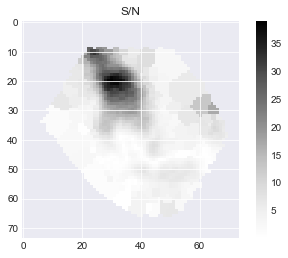

0.005840873171744809


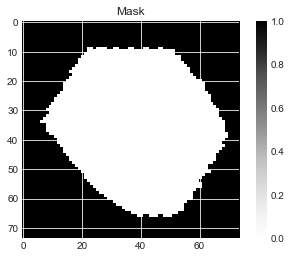

In [2]:
import matplotlib.pyplot as plt
from marvin.tools.maps import Maps
import numpy as np

maps = Maps(plateifu='7443-12703')
print(maps)
# get an emission line map
stellar = maps.stellar_vel
values = stellar.value
ivar = stellar.ivar
error = np.sqrt(1/ivar)
mask = stellar.mask
plt.clf()
stellar.plot()
plt.show()

plt.imshow(error)
plt.colorbar()
plt.show()

import numpy.ma as ma
S_N = np.abs(values/error)
ma_S_N = ma.masked_where(S_N==0, S_N)
plt.imshow(ma_S_N)
plt.title('S/N')
plt.colorbar()
plt.show()

print(np.min(ma_S_N))

plt.imshow(mask, vmin=0, vmax=1)
plt.title('Mask')
plt.colorbar()
plt.show()

In [12]:
import matplotlib.pyplot as plt
from marvin.tools import Maps
plt.style.use('seaborn-darkgrid')

names=['8720-12702','7992-3702','8592-6103','9196-9102','8588-1902',
      '8979-3702','8439-6103','8612-12703','8993-9101','8600-1901',
      '8083-12705','9036-3703','8139-6103','8600-9101','9035-1902',
      '8485-12701','8936-3702','7958-6103','8950-9101','8444-1901']

plt.clf()

fig, ax = plt.subplots()
S_N_per_ang=[]
for j in range(len(names)):

    maps = Maps(names[j])
    spax = maps.getSpaxel(x=0, y=0, xyorig='center', cube=True, modelcube=True)

    S_N = spax.flux.value / (1/np.sqrt(spax.flux.ivar))
    S_N_per_ang.append(S_N)
    ax.plot(spax.flux.wavelength, S_N/np.max(S_N), lw=0.5)#, label=names[j])
#print(np.shape(S_N_per_ang))
avg = np.median(S_N_per_ang,axis=0)#/len(names)
plt.plot(spax.flux.wavelength, avg / np.max(avg), label='Average', color='black', lw=0.75)
plt.legend()
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Normalized Median S/N')
plt.savefig('average_S_N.pdf')


np.save('average_S_N.npy', np.median(S_N_per_ang,axis=0))

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:19: RuntimeWarning: divide by zero encountered in true_divide
Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data usi

In [14]:
'''Now, calculating for a bunch of different positions in the galaxies'''

import matplotlib.pyplot as plt
from marvin.tools import Maps
plt.style.use('seaborn-darkgrid')

names=['8720-12702','7992-3702','8592-6103','9196-9102','8588-1902',
      '8979-3702','8439-6103','8612-12703','8993-9101','8600-1901',
      '8083-12705','9036-3703','8139-6103','8600-9101','9035-1902',
      '8485-12701','8936-3702','7958-6103','8950-9101','8444-1901']

plt.clf()

fig, ax = plt.subplots()

pos = [-10, -5, 0,5,10]

for i in range(len(pos)):
    S_N_per_ang=[]
    for j in range(len(names)):

        maps = Maps(names[j])
        spax = maps.getSpaxel(x=pos[i], y=pos[i], xyorig='center', cube=True, modelcube=True)

        S_N = spax.flux.value / (1/np.sqrt(spax.flux.ivar))
        S_N_per_ang.append(S_N)
        #ax.plot(spax.flux.wavelength, S_N, lw=0.5)#, label=names[j])
    #print(np.shape(S_N_per_ang))

    average_ivar = np.median(S_N_per_ang,axis=0)#/len(names)
    ax.plot(spax.flux.wavelength, average_ivar/np.max(average_ivar), lw=0.5, label=pos[i])#, label='Average', color='black')


plt.legend()
plt.xlabel('Wavelength [$\AA$]')
plt.ylabel('Normalized Median S/N')
plt.savefig('average_S_N_allpos.pdf')


#np.save('average_S_N.npy', np.sum(S_N_per_ang,axis=0)/len(names))

/Users/beckynevin/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:25: RuntimeWarning: divide by zero encountered in true_divide
Sentry responded with an API error: RateLimited(Creation of this event was denied due to rate limiting)
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data using input parameters.']
['failed to retrieve data usi

In [22]:
'''Now look at the LSF for different spaxels'''
from marvin.tools import Cube
cube = Cube(plateifu='8485-1901')
print(maps.datamodel)

[<Property 'spx_skycoo', channel='on_sky_x', release='2.2.1', unit='arcsec'>, <Property 'spx_skycoo', channel='on_sky_y', release='2.2.1', unit='arcsec'>, <Property 'spx_ellcoo', channel='elliptical_radius', release='2.2.1', unit='arcsec'>, <Property 'spx_ellcoo', channel='r_re', release='2.2.1', unit=''>, <Property 'spx_ellcoo', channel='elliptical_azimuth', release='2.2.1', unit='deg'>, <Property 'spx_mflux', channel='None', release='2.2.1', unit='1e-17 erg / (cm2 s spaxel)'>, <Property 'spx_snr', channel='None', release='2.2.1', unit=''>, <Property 'binid', channel='binned_spectra', release='2.2.1', unit=''>, <Property 'binid', channel='stellar_continua', release='2.2.1', unit=''>, <Property 'binid', channel='em_line_moments', release='2.2.1', unit=''>, <Property 'binid', channel='em_line_models', release='2.2.1', unit=''>, <Property 'binid', channel='spectral_indices', release='2.2.1', unit=''>, <Property 'bin_lwskycoo', channel='lum_weighted_on_sky_x', release='2.2.1', unit='arcse